# Book Publishing

In [1]:
# Imports
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data
uk_pub = pd.read_csv("data/Book Publishing Salary Transparency (UK) - Form responses 1.csv")

## UK Publishing

#### Checking Data

In [3]:
uk_pub.head()

,Timestamp,Job Title,Employer,Location,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Pubishing,Years of Overall Experience,Additional Compensation,Additional Information,Unnamed: 13,Unnamed: 14
0,17/06/2020 10:42:08,Marketing manager,Penguin Random House,London,£36k,Full-time,White,Woman (cisgender),Straight,3,9,Annual bonus,NaN,NaN,NaN
1,17/06/2020 10:45:51,Early careere coordinator,Penguin random house,London,"23,000 per annum",Full-time,Black african,Woman (cisgender),Bisexual,2,2,Can't remember,NaN,NaN,NaN
2,17/06/2020 10:51:09,Audience and Digital Development Assistant,Penguin random house,London,"£23,000",Full-time,British Indian,Woman (cisgender),Straight,1,4,1% increase after 7 months in line with the re...,I worked in publishing 2016-17. After leaving ...,NaN,NaN
3,17/06/2020 10:58:25,Publicity Officer,Penguin Random House,80 Strand,"£28,000",Full-time,White British,Woman (cisgender),Pansexual,3,6,"Annual bonus of approx £500, all expenses paid...",This role was my first and only role in publis...,NaN,NaN
4,17/06/2020 11:03:40,Creative art worker,Pan Macmillan Publishing,London,£115 per day,Contract,British Indian,Woman (cisgender),Straight,7,10,0,I was pregnant,NaN,NaN


In [4]:
uk_pub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Timestamp                    1018 non-null   object
 1   Job Title                    1020 non-null   object
 2   Employer                     1021 non-null   object
 3   Location                     975 non-null    object
 4   Salary                       1021 non-null   object
 5   Employment Status            1021 non-null   object
 6   Race / Ethnicity             1011 non-null   object
 7   Gender Identity              1020 non-null   object
 8   Sexual Orientation           1008 non-null   object
 9   Years in Pubishing           1008 non-null   object
 10  Years of Overall Experience  986 non-null    object
 11  Additional Compensation      900 non-null    object
 12  Additional Information       420 non-null    object
 13  Unnamed: 13                  7 no

In [5]:
uk_pub.shape

(1021, 15)

#### Cleaning Data

In [6]:
# Check columns
uk_pub.columns

Index(['Timestamp', 'Job Title', 'Employer', 'Location', 'Salary',
       'Employment Status', 'Race / Ethnicity', 'Gender Identity',
       'Sexual Orientation', 'Years in Pubishing',
       'Years of Overall Experience', 'Additional Compensation',
       'Additional Information', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [7]:
# Extract columns that we will be working with
cols = ['Job Title', 'Salary', 'Employment Status','Race / Ethnicity', 'Gender Identity',
       'Sexual Orientation', 'Years in Pubishing']
uk_pub = uk_pub.loc[:, cols]

In [8]:
# Check missing values
uk_pub.isnull().sum()

Job Title              1
Salary                 0
Employment Status      0
Race / Ethnicity      10
Gender Identity        1
Sexual Orientation    13
Years in Pubishing    13
dtype: int64

In [9]:
# Rename misspelling in column name
uk_pub.rename(columns={'Years in Pubishing':'Years in Publishing'}, inplace=True)

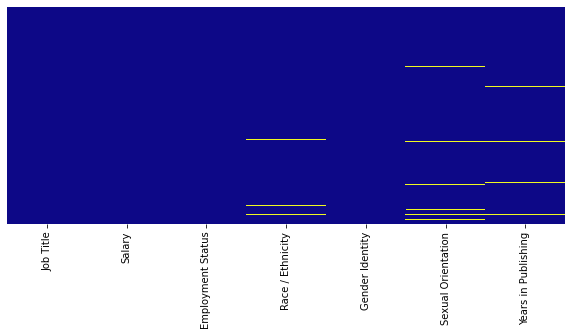

In [10]:
# Visualise missing data
fig, ax = plt.subplots(figsize=(10,4))
ax = sns.heatmap(uk_pub.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [11]:
uk_pub.head()

,Job Title,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing
0,Marketing manager,£36k,Full-time,White,Woman (cisgender),Straight,3
1,Early careere coordinator,"23,000 per annum",Full-time,Black african,Woman (cisgender),Bisexual,2
2,Audience and Digital Development Assistant,"£23,000",Full-time,British Indian,Woman (cisgender),Straight,1
3,Publicity Officer,"£28,000",Full-time,White British,Woman (cisgender),Pansexual,3
4,Creative art worker,£115 per day,Contract,British Indian,Woman (cisgender),Straight,7


#### Years in Publishing Column

In [12]:
# Replace all instances of 'Less than 1' to 0 in 'Years in Publishing' column
uk_pub.loc[uk_pub['Years in Publishing'] == 'Less than 1', 'Years in Publishing'] = 0

In [13]:
# Convert 'Years in Publishing' to numeric data type
uk_pub['Years in Publishing'] = pd.to_numeric(uk_pub['Years in Publishing'], errors='coerce')

In [14]:
# Check value counts for years in publishing
uk_pub['Years in Publishing'].value_counts(dropna=False)

3.0     150
4.0     141
5.0     126
2.0     118
7.0      75
6.0      67
1.0      61
0.0      53
8.0      52
10.0     34
9.0      25
12.0     22
11.0     20
NaN      14
15.0     13
14.0     12
13.0     10
20.0      8
16.0      5
18.0      4
19.0      3
21.0      2
24.0      2
25.0      1
27.0      1
26.0      1
17.0      1
Name: Years in Publishing, dtype: int64

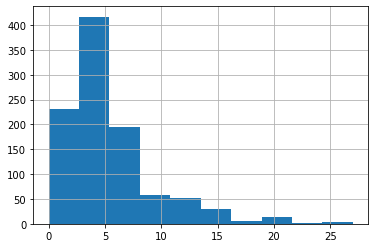

In [15]:
# Visualise the distribution of years in ublishing
uk_pub['Years in Publishing'].hist();

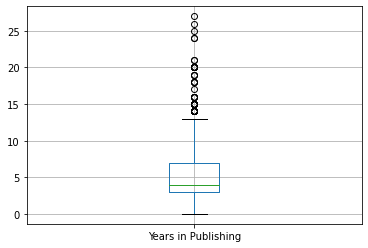

In [16]:
# Boxplot for years in publishing
uk_pub.boxplot(column=['Years in Publishing']);

In [17]:
# Descriptive statistics for years in publishing
uk_pub[['Years in Publishing']].describe()

,Years in Publishing
count,1007.000000
mean,5.342602
std,4.129225
min,0.000000
25%,3.000000
50%,4.000000
75%,7.000000
max,27.000000


In [18]:
# Due to the number of outliers we will fill the null values with median instad of mean
uk_pub['Years in Publishing'].fillna(uk_pub['Years in Publishing'].median(), inplace=True)

In [19]:
# Do I need to do anything to deal with the outliers? -- Don't think so

#### Gender Identity Column

In [20]:
# Check value counts of gender identity
uk_pub['Gender Identity'].value_counts()

Woman (cisgender)                                                           884
Man (cisgender)                                                             110
Prefer not to say                                                            14
Non-binary                                                                    7
Woman (non-binary)                                                            2
https://unitetheunion.org/why-join/membership-types/unite-young-members/      1
White (Scandinavian immigrant)                                                1
Prefer to self-describe                                                       1
Name: Gender Identity, dtype: int64

Here we have a few strange values that we will need to deal with. From the Woman (non-binary) down, it is unclear what these people's Gender Identity is so we will have to filter them out. Luckily, they only  comprise of 5 individuals.

In [21]:
# Filter out those groups which have less than 5 people in them
uk_pub = uk_pub.groupby('Gender Identity').filter(lambda x: len(x) > 5)

In [22]:
# Remove '(cisgender)' from 'Woman' and 'Man'
uk_pub.loc[uk_pub['Gender Identity'] == 'Woman (cisgender)', 'Gender Identity'] = 'Woman'
uk_pub.loc[uk_pub['Gender Identity'] == 'Man (cisgender)', 'Gender Identity'] = 'Man'

In [23]:
# Check value counts of gender identity
uk_pub['Gender Identity'].value_counts()

Woman                884
Man                  110
Prefer not to say     14
Non-binary             7
Name: Gender Identity, dtype: int64

In [24]:
# Need to encode these using pd.get_dummies later on

#### Sexual Orientation Column

In [25]:
# Check values for sexual orientation
uk_pub['Sexual Orientation'].value_counts(dropna=False)

Straight                                          733
Bisexual                                          109
Prefer not to say                                  53
Queer                                              32
Gay                                                22
Questioning                                        16
Lesbian                                            14
Pansexual                                          12
NaN                                                12
Asexual                                             9
Demisexual                                          1
no labels (not straight but sexuality is fake)      1
Asexual/Queer                                       1
Name: Sexual Orientation, dtype: int64

In [26]:
# Fill null values with mode
uk_pub['Sexual Orientation'].fillna(uk_pub['Sexual Orientation'].mode()[0], inplace=True)

In [27]:
# Group all non-straight into a single category
uk_pub.loc[uk_pub['Sexual Orientation'] != 'Straight', 'Sexual Orientation'] = 'LGBTQ'

#### Race/Ethnicity Column

In [28]:
# Check unique values for race and ethnicity
uk_pub['Race / Ethnicity'].unique()

array(['White', 'Black african ', 'British Indian', 'White British',
       'British Indian ', 'White British ', 'White Australian',
       'Black Caribbean ', 'Pakistani', 'Caucasian ', 'Black British ',
       'Black', 'White/Irish', 'Caucasian', 'White ', 'Asian',
       'Caucasian / Greek', 'Chinese', 'White, British',
       'White (Not British)', 'White/irish', 'White/British',
       'British Asian', 'Mixed (White British and British Indian)',
       'Mixed', 'Black/African-British', 'White (other)',
       'Mixed race - White and East Asian', 'white', 'White European',
       'South Asian ', 'White/European', 'South Asian', 'white british',
       'Mixed white and asian', 'White british', 'Black British',
       'Mixed - White/Asian', 'South-Asian', 'white (other)',
       'Mixed (White and Asian)', 'Mixed Afro/Indo Caribbean and White',
       'White/Irish ', 'British Asian ', 'South Asian origin',
       'British Asian - Indian ', 'Black African ',
       'British Asian - Ind

In [29]:
# Fill null values with mode
uk_pub['Race / Ethnicity'].fillna(uk_pub['Race / Ethnicity'].mode()[0], inplace=True)

In [30]:
# Correct specific values before applying function
uk_pub.loc[uk_pub['Race / Ethnicity'] == 'Not white', 'Race / Ethnicity'] = 'Other'
uk_pub.loc[uk_pub['Race / Ethnicity'] == 'Whote', 'Race / Ethnicity'] = 'White'
uk_pub.loc[uk_pub['Race / Ethnicity'] == 'British Insian', 'Race / Ethnicity'] = 'British Indian'

In [31]:
# Check for matches of specific races -- Might need to remove this later on
uk_pub[uk_pub['Race / Ethnicity'].str.match('Chinese')]['Race / Ethnicity']

32           Chinese
77           Chinese
252          Chinese
462    Chinese/White
492          Chinese
616          Chinese
653          Chinese
734          Chinese
Name: Race / Ethnicity, dtype: object

In [32]:
# Function for simplifying race
def simplify_race(x):
    if 'mixed' in x.lower():
        return 'Mixed'
    elif 'black' in x.lower() or 'bame' in x.lower():
        return 'Black'
    elif 'asian' in x.lower() or 'chinese' in x.lower() or 'indian' in x.lower() or \
                                 'pakistani' in x.lower() or 'bangladeshi' in x.lower():
        return 'Asian'
    elif 'white' in x.lower() or 'caucasian' in x.lower():
        return 'White'
    else:
        return 'Unknown'

In [33]:
# Apply function
uk_pub['Race / Ethnicity'] = uk_pub['Race / Ethnicity'].apply(simplify_race)

In [34]:
# Check number of unique values
uk_pub['Race / Ethnicity'].nunique()

5

In [35]:
uk_pub.head()

,Job Title,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing
0,Marketing manager,£36k,Full-time,White,Woman,Straight,3.0
1,Early careere coordinator,"23,000 per annum",Full-time,Black,Woman,LGBTQ,2.0
2,Audience and Digital Development Assistant,"£23,000",Full-time,Asian,Woman,Straight,1.0
3,Publicity Officer,"£28,000",Full-time,White,Woman,LGBTQ,3.0
4,Creative art worker,£115 per day,Contract,Asian,Woman,Straight,7.0


#### Employment Status Column

In [36]:
# Check unique values for employment status
uk_pub['Employment Status'].unique()

array(['Full-time', 'Contract', 'Part-time', 'Parental leave cover',
       'Part-Time (32 hours per week)',
       'full-time but no contract, paid hourly',
       "I have just left this job but feel it's important for it to be logged",
       'Left position in 2019 due to low salary',
       "Full Time but wasn't permanent - they made anyone who wasn't permanent take unpaid six week breaks before you reached two years and then would hire you again ",
       'Rolling temp contract', 'intern', 'Freelance'], dtype=object)

In [37]:
# Function for simplifying employment status
def simplify_employment_status(x):
    if 'part-time' in x.lower():
        return 'Part-time'
    elif 'full-time' in x.lower():
        return 'Full-time'
    elif 'contract' in x.lower():
        return 'Contract'
    else:
        return 'Other'

In [38]:
# Apply function
uk_pub['Employment Status'] = uk_pub['Employment Status'].apply(simplify_employment_status)

In [39]:
uk_pub.head()

,Job Title,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing
0,Marketing manager,£36k,Full-time,White,Woman,Straight,3.0
1,Early careere coordinator,"23,000 per annum",Full-time,Black,Woman,LGBTQ,2.0
2,Audience and Digital Development Assistant,"£23,000",Full-time,Asian,Woman,Straight,1.0
3,Publicity Officer,"£28,000",Full-time,White,Woman,LGBTQ,3.0
4,Creative art worker,£115 per day,Contract,Asian,Woman,Straight,7.0


#### Salary Column

In [40]:
uk_pub[['Salary']].head(3)

,Salary
0,£36k
1,"23,000 per annum"
2,"£23,000"


In [41]:
# Use a variety of regex expressions to extract correct salary values
def extract_salary(x):
    if re.search(r"^£\d+,[0-9]{3}.{0,21}$", x):
        return x.replace(',', '')[1:6]
    elif re.search(r"^£?\d\d[kK]\s?$", x): 
        return x[-3:-1] + "000"
    elif re.search(r"^\d+[,.\s]\s?0", x):
        return x[:2] + "000"
    elif re.search(r"^\d+[,.\s]\s?0{3}", x):
        return x[0:2] + "000"
    elif re.search("^£?\d{5}0?", x):
        x = x.strip('£')
        if '.' in x:
            return x[:5]
        else:
            return x.split(' ')[0]
    elif re.search(r"[kK]$", x):
        if '.' in x:
            return x.split('.')[0][-2:] + x.split('.')[1][0] + "00"
        elif '-' in x:
            return x.split('-')[1][:2] + "000"
        else:
            return x[-3:-1] + "000"
    else:
        return x

In [42]:
# Map function to each salary element
uk_pub['Salary'] = uk_pub['Salary'].map(extract_salary)

In [43]:
uk_pub.head(20)

,Job Title,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing
0,Marketing manager,36000,Full-time,White,Woman,Straight,3.0
1,Early careere coordinator,23000,Full-time,Black,Woman,LGBTQ,2.0
2,Audience and Digital Development Assistant,23000,Full-time,Asian,Woman,Straight,1.0
3,Publicity Officer,28000,Full-time,White,Woman,LGBTQ,3.0
4,Creative art worker,£115 per day,Contract,Asian,Woman,Straight,7.0
5,Executive (marketing and operations),"£21k starting, £27k 5 years later",Full-time,White,Woman,Straight,6.0
6,Project & Brand Exec,31000,Full-time,White,Woman,Straight,3.0
7,Coordinator (Creative Responsibility),"£25,000 entering in Sept 2016, £29,248.44 exit...",Full-time,White,Woman,Straight,3.0
8,Corporate responsibility assistant,25500,Full-time,Black,Woman,Straight,1.0
9,Press Officer,26600,Full-time,White,Woman,LGBTQ,4.0


In [44]:
# Correct salary values for those that were not captured by the regex expressions

# £115 per day --> (52(week)*5(work days) - 20(days holiday))*115(day rate)
uk_pub.loc[uk_pub['Salary'] == '£115 per day ', 'Salary'] = '27600'

# # £21k starting, £27k 5 years later 
uk_pub.loc[uk_pub['Salary'] == '£21k starting, £27k 5 years later ', 'Salary'] = '27000'

# £25,000 entering in Sept 2016, £29,248.44 exiting in Sept 2019
uk_pub.loc[uk_pub['Salary'] == '£25,000 entering in Sept 2016, £29,248.44 exiting in Sept 2019', 'Salary'] = '29248'

# £30,000 (as of 2020; started role in 2016)
uk_pub.loc[uk_pub['Salary'] == '£30,000 (as of 2020; started role in 2016)', 'Salary'] = '30000'

# 20k starting
uk_pub.loc[uk_pub['Salary'] == '20k starting', 'Salary'] = '20000'

# 34
uk_pub.loc[uk_pub['Salary'] == '34', 'Salary'] = '34000'

# 28.50£
uk_pub.loc[uk_pub['Salary'] == '28.50£', 'Salary'] = '28500'

# £25, 000
uk_pub.loc[uk_pub['Salary'] == '£25, 000', 'Salary'] = '25000'

# approx £11-13,000 p.a.
uk_pub.loc[uk_pub['Salary'] == 'approx £11-13,000 p.a.', 'Salary'] = '13000'

# £38.5k (increase to £40k delayed by covid)
uk_pub.loc[uk_pub['Salary'] == '£38.5k (increase to £40k delayed by covid)', 'Salary'] = '40000'

# 21.5
uk_pub.loc[uk_pub['Salary'] == '21.5', 'Salary'] = '21500'

# £24K annually 
uk_pub.loc[uk_pub['Salary'] == '£24K annually ', 'Salary'] = '24000'

# £18,000 (£19k after 6-month probation)
uk_pub.loc[uk_pub['Salary'] == '£18,000 (£19k after 6-month probation)', 'Salary'] = '19000'

# £23k to start rising to £23,500
uk_pub.loc[uk_pub['Salary'] == '£23k to start rising to £23,500', 'Salary'] = '23500'

# £26 266
uk_pub.loc[uk_pub['Salary'] == '£26 266', 'Salary'] = '26266'

# 28
uk_pub.loc[uk_pub['Salary'] == '28', 'Salary'] = '28000'

# £15.5k (2015), £16.9k (2016), £18.9k (2017)
uk_pub.loc[uk_pub['Salary'] == '£15.5k (2015), £16.9k (2016), £18.9k (2017)', 'Salary'] = '18900'

# £22,000 start, £24,000 2 years on
uk_pub.loc[uk_pub['Salary'] == '£22,000 start, £24,000 2 years on', 'Salary'] = '24000'

# 31'800
uk_pub.loc[uk_pub['Salary'] == "31'800", 'Salary'] = '31800'

# £38
uk_pub.loc[uk_pub['Salary'] == '£38', 'Salary'] = '38000'

# £28k pro rata
uk_pub.loc[uk_pub['Salary'] == '£28k pro rata', 'Salary'] = '28000'

# 34,850 (full time)
uk_pub.loc[uk_pub['Salary'] == '34,850 (full time)', 'Salary'] = '34850'

# 5k000
uk_pub.loc[uk_pub['Salary'] == '5k000', 'Salary'] = '50000'

# Started at £21500 but increased to £22500 after a year
uk_pub.loc[uk_pub['Salary'] == 'Started at £21500 but increased to £22500 after a year', 'Salary'] = '22500'

In [45]:
# Drop rows where people do not make a salary

# List of entries that indicate no salary
no_salary = ['Unpaid with £100/week stipend', '0']

# Find indexes of people with no salary
ppl_no_salary = uk_pub[uk_pub['Salary'].isin(no_salary)].index

# Remove people with no salary 
uk_pub = uk_pub[~uk_pub.index.isin(ppl_no_salary)]

In [46]:
uk_pub.head()

,Job Title,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing
0,Marketing manager,36000,Full-time,White,Woman,Straight,3.0
1,Early careere coordinator,23000,Full-time,Black,Woman,LGBTQ,2.0
2,Audience and Digital Development Assistant,23000,Full-time,Asian,Woman,Straight,1.0
3,Publicity Officer,28000,Full-time,White,Woman,LGBTQ,3.0
4,Creative art worker,27600,Contract,Asian,Woman,Straight,7.0


In [47]:
uk_pub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1013 entries, 0 to 1020
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job Title            1013 non-null   object 
 1   Salary               1013 non-null   object 
 2   Employment Status    1013 non-null   object 
 3   Race / Ethnicity     1013 non-null   object 
 4   Gender Identity      1013 non-null   object 
 5   Sexual Orientation   1013 non-null   object 
 6   Years in Publishing  1013 non-null   float64
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [48]:
# Convert salary to numeric data type
uk_pub['Salary'] = uk_pub['Salary'].astype('int64')

### EDA

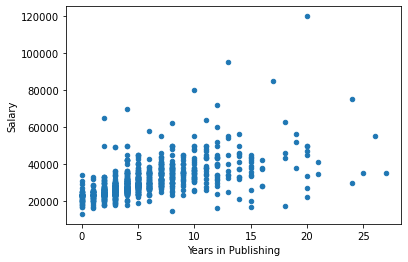

In [50]:
# Checking relationship between salary and years in publishing
uk_pub.plot(kind='scatter', x='Years in Publishing', y='Salary');

In [51]:
# Descriptive statistics with outlier
uk_pub.describe()

,Salary,Years in Publishing
count,1013.00000,1013.000000
mean,30328.34156,5.337611
std,8871.36892,4.109968
min,13000.00000,0.000000
25%,25000.00000,3.000000
50%,28000.00000,4.000000
75%,34000.00000,7.000000
max,120000.00000,27.000000


In [52]:
# Descriptive statistics without outlier
uk_pub[uk_pub['Salary'] < 100000].describe()

,Salary,Years in Publishing
count,1012.000000,1012.000000
mean,30239.733202,5.323123
std,8415.322606,4.086036
min,13000.000000,0.000000
25%,25000.000000,3.000000
50%,28000.000000,4.000000
75%,34000.000000,7.000000
max,95000.000000,27.000000


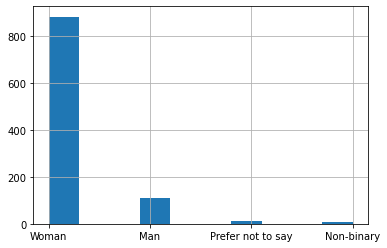

In [53]:
# Counts for gender identity
uk_pub['Gender Identity'].hist();

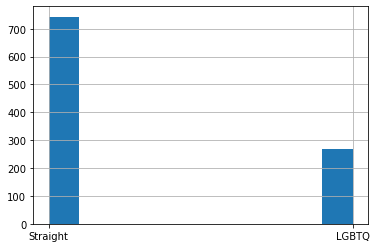

In [54]:
# Counts for sexual orientation
uk_pub['Sexual Orientation'].hist();

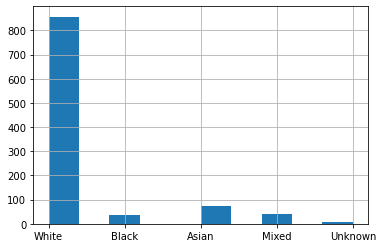

In [55]:
# Counts for race and ethnicity
uk_pub['Race / Ethnicity'].hist();

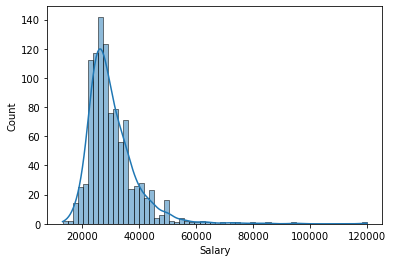

In [56]:
# Visualise distribution of salary
sns.histplot(uk_pub['Salary'], kde=True);

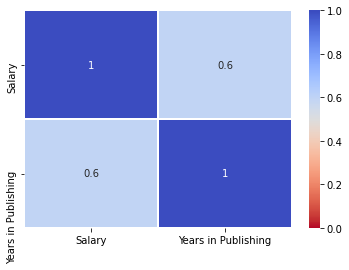

In [57]:
# Visualise correlations between numerical variables
sns.heatmap(uk_pub.corr(), vmin=0, annot=True, linewidths=.5, cmap='coolwarm_r');

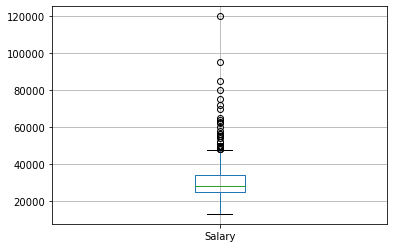

In [58]:
# Boxplot for salary
uk_pub.boxplot(column = ['Salary']);

In [147]:
# Remove outliers for salary - removing top .05% and bottom .05%
uk_pub_outliers = uk_pub[(uk_pub['Salary'] < uk_pub['Salary'].quantile(.995)) & 
                         (uk_pub['Salary'] > uk_pub['Salary'].quantile(.005))]

In [148]:
# Remove only top end outliers - MAYBE REMOVE THIS AFTER TESTING
uk_pub_outliers2 = uk_pub[(uk_pub['Salary'] < uk_pub['Salary'].quantile(.995))]

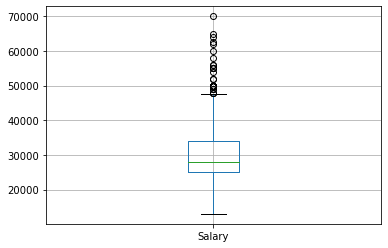

In [128]:
# Boxplot for salary with outliers removed
uk_pub_outliers.boxplot(column = ['Salary']);

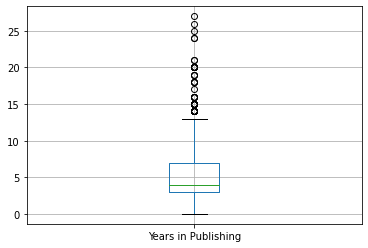

In [129]:
# Boxplot for years in publishing 
uk_pub.boxplot(column = ['Years in Publishing']);

In [149]:
# Remove outliers here for years in publishing - removing top .05% and bottom .05%
uk_pub_outliers = uk_pub_outliers[(uk_pub_outliers['Years in Publishing'] < uk_pub_outliers['Years in Publishing'].quantile(.995)) & 
                         (uk_pub_outliers['Years in Publishing'] > uk_pub_outliers['Years in Publishing'].quantile(.005))]

In [151]:
# Remove only top end outliers - MAYBE REMOVE THIS AFTER TESTING
uk_pub_outliers2 = uk_pub_outliers2[(uk_pub_outliers2['Years in Publishing'] < uk_pub_outliers2['Years in Publishing'].quantile(.995))]

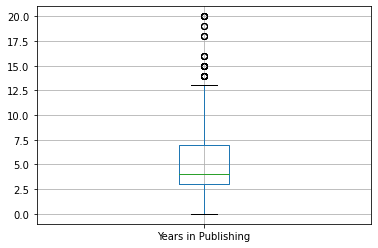

In [131]:
# Boxplot for years in publishing with outliers removed
uk_pub_outliers.boxplot(column = ['Years in Publishing']);

In [86]:
uk_pub.columns

Index(['Job Title', 'Salary', 'Employment Status', 'Race / Ethnicity',
       'Gender Identity', 'Sexual Orientation', 'Years in Publishing'],
      dtype='object')

Chart for Employment Status | Total = 4


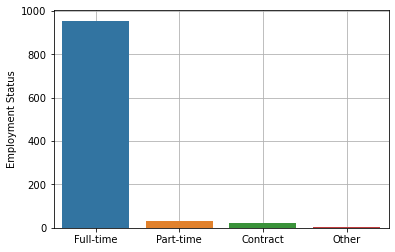

Chart for Race / Ethnicity | Total = 5


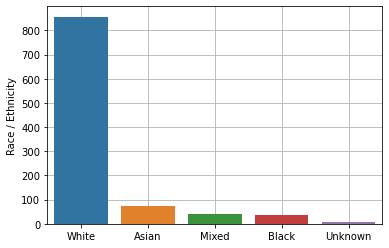

Chart for Gender Identity | Total = 4


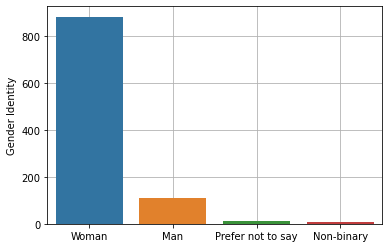

Chart for Sexual Orientation | Total = 2


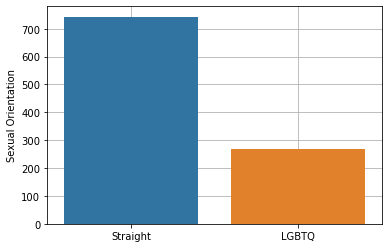

Chart for Years in Publishing | Total = 26


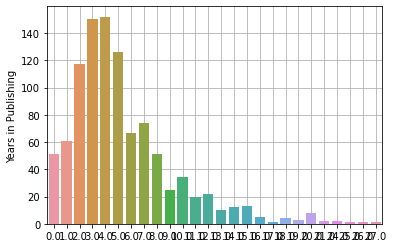

In [60]:
for feature in uk_pub.columns[2:7]:
    feature_num = uk_pub[feature].value_counts()
    print(f"Chart for {feature} | Total = {len(feature_num)}")
    chart = sns.barplot(x=feature_num.index, y=feature_num, zorder=2)
    chart.set_xticklabels(chart.get_xticklabels())
    plt.grid()
    plt.show()

In [61]:
pd.pivot_table(uk_pub, index='Race / Ethnicity', 
    values=['Salary', 'Years in Publishing']).sort_values('Salary', 
    ascending=False)

# or

# uk_pub.groupby('Race / Ethnicity').mean().sort_values('Salary', ascending=False)

,Salary,Years in Publishing
Race / Ethnicity,,
Unknown,33871.428571,8.285714
White,30562.694282,5.465578
Asian,29926.432432,4.729730
Mixed,28669.230769,4.923077
Black,26684.027778,3.416667


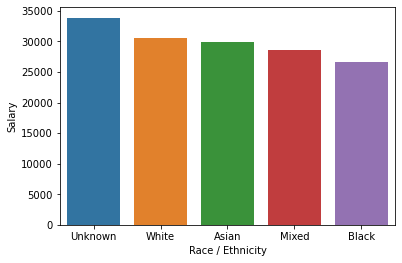

In [62]:
# Plot graph showing mean salary amount for Race / Ethnicity
race_salary = pd.pivot_table(uk_pub, index='Race / Ethnicity', values='Salary').sort_values('Salary', ascending=False)
sns.barplot(x=race_salary.index, y="Salary", data=race_salary);

In [63]:
pd.pivot_table(uk_pub, index='Gender Identity', 
    values=['Salary', 'Years in Publishing']).sort_values('Salary', ascending=False)

,Salary,Years in Publishing
Gender Identity,,
Prefer not to say,38892.307692,8.692308
Man,30748.081818,5.927273
Woman,30152.571914,5.214043
Non-binary,30000.000000,5.428571


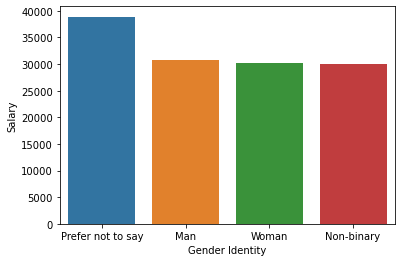

In [64]:
# Plot graph showing mean salary amount for Gender Identity
gender_salary = pd.pivot_table(uk_pub, index='Gender Identity', values='Salary').sort_values('Salary', ascending=False)
sns.barplot(x=gender_salary.index, y="Salary", data=gender_salary);

In [65]:
pd.pivot_table(uk_pub, index='Sexual Orientation', 
    values=['Salary', 'Years in Publishing']).sort_values('Salary', ascending=False)

,Salary,Years in Publishing
Sexual Orientation,,
Straight,30693.347241,5.502019
LGBTQ,29323.900000,4.885185


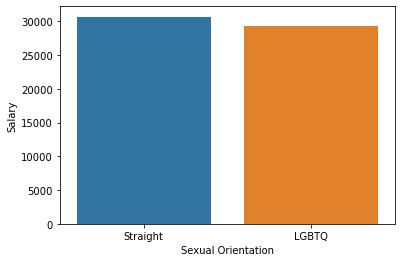

In [66]:
# Plot graph showing mean salary amount for Sexual Orientation
sexori_salary = pd.pivot_table(uk_pub, index='Sexual Orientation', values='Salary').sort_values('Salary', ascending=False)
sns.barplot(x=sexori_salary.index, y="Salary", data=sexori_salary);

In [67]:
pd.pivot_table(uk_pub, index='Years in Publishing', 
                       values=['Salary']).sort_index().head()

,Salary
Years in Publishing,
0.0,22436.333333
1.0,23446.049180
2.0,25418.247863
3.0,26261.206667
4.0,29266.782895


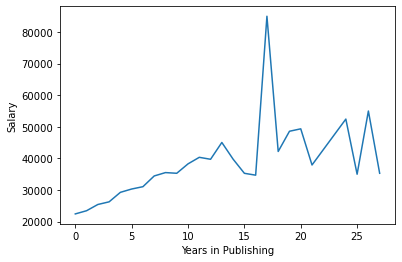

In [68]:
# Plot graph showing mean salary amount for Each year or Years in Publishing
yip_salary = pd.pivot_table(uk_pub, index='Years in Publishing', values='Salary').sort_values('Salary', ascending=False)
sns.lineplot(x=yip_salary.index, y="Salary", data=yip_salary);

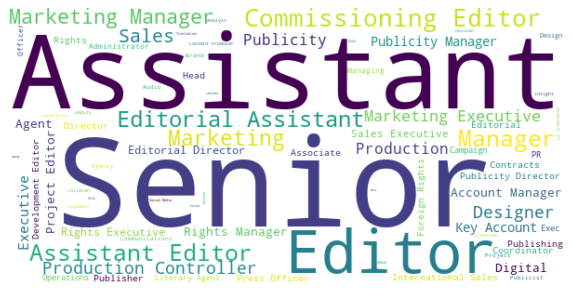

In [69]:
# Word Cloud for Job Titles
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Set up text
text = " ".join(title for title in uk_pub['Job Title'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=STOPWORDS, random_state=21, background_color="white", width=600, height=300)
wordcloud.generate(text)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Model Building

#### Using sklearn

In [152]:
# Top 0.05% and bottom 0.05% removed
uk_pub_final = uk_pub_outliers.drop(['Job Title'], axis=1)

In [153]:
# Only top 0.05% removed
uk_pub_final2 = uk_pub_outliers2.drop(['Job Title'], axis=1)

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [155]:
# Simple linear regression
X1 = uk_pub_final['Years in Publishing'].values.reshape(-1,1)
y1 = uk_pub_final['Salary'].values.reshape(-1,1)

X1b = uk_pub_final2['Years in Publishing'].values.reshape(-1,1)
y1b = uk_pub_final2['Salary'].values.reshape(-1,1)

In [156]:
# Create train/test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)
X_train1b, X_test1b, y_train1b, y_test1b = train_test_split(X1b, y1b, test_size=0.2, random_state=0)

In [167]:
# Create model and fit to the training data
reg = LinearRegression()
reg.fit(X_train1, y_train1)
print(reg.score(X_train1, y_train1))
print(reg.coef_)
y_hat1 = reg.predict(X_train1)
print()
regb = LinearRegression()
regb.fit(X_train1b, y_train1b)
print(regb.score(X_train1b, y_train1b))
print(regb.coef_)
y_hat1b = regb.predict(X_train1b)

0.3826897803011434
[[1365.2846751]]

0.3646499239046056
[[1252.84027663]]


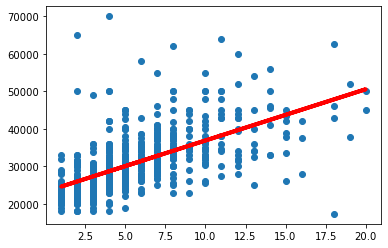

In [163]:
# Plot results for predictions of training data
plt.scatter(X_train1, y_train1)
plt.plot(X_train1, y_hat1, linewidth=4, color='red')
plt.show()

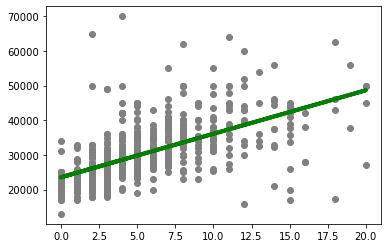

In [164]:
# Plot results for predictions of training data - uk_pub_final2
plt.scatter(X_train1b, y_train1b, color='grey')
plt.plot(X_train1b, y_hat1b, linewidth=4, color='green')
plt.show()

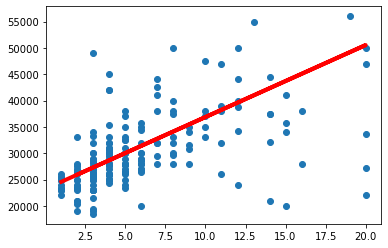

In [165]:
# Plot results for predictions of test data
y_hat_test1 = reg.predict(X_test1)
plt.scatter(X_test1, y_test1)
plt.plot(X_test1, y_hat_test1, linewidth=4, color='red')
plt.show()

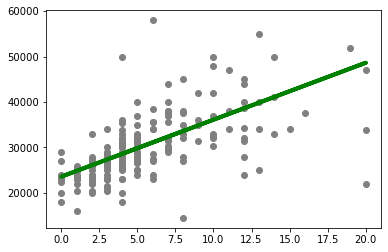

In [166]:
# Plot results for predictions of test data - uk_pub_final2
y_hat_test1b = regb.predict(X_test1b)
plt.scatter(X_test1b, y_test1b, color='grey')
plt.plot(X_test1b, y_hat_test1b, linewidth=4, color='green')
plt.show()

In [168]:
# Checking the residual errors of the model
mae = mean_absolute_error(y_hat_test1, y_test1)
rmse = math.sqrt(mean_squared_error(y_hat_test1, y_test1))
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 4347.076153385423
RMSE: 6462.4927506954355


#### Using statsmodels

In [171]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [181]:
# Separate independent and dependent variable
X1b = uk_pub_final['Years in Publishing']
y1b = uk_pub_final['Salary']

In [178]:
# Add constant
X1b = add_constant(X1b)

In [183]:
# Create train/test split
X_train1b, X_test1b, y_train1b, y_test1b = train_test_split(X1b, y1b, test_size=0.2, random_state=0)

In [188]:
# Create and fit sm model
reg_sm1b = sm.OLS(y_train1b, X_train1b).fit()
print(reg_sm1b.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     467.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           4.90e-81
Time:                        02:31:03   Log-Likelihood:                -7640.5
No. Observations:                 756   AIC:                         1.528e+04
Df Residuals:                     754   BIC:                         1.529e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.323e+04    

In [189]:
# Multiple Linear Regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [211]:
# Separate independent variables from dependent variables
X2 = uk_pub_final.drop(['Salary'], axis=1)
y2 = uk_pub_final['Salary']

In [212]:
# Create dummy variables for categorical columns (automatically detects categorical variables)
X2 = pd.get_dummies(X2, drop_first=True)

# # or you can state explicitly which columns to create dummies from
# dummy_cols = ['Employment Status', 'Race / Ethnicity', 'Gender Identity', 'Sexual Orientation']
# X2 = pd.get_dummies(X2, columns=dummy_cols, drop_first=True)

# Add constant
X2 = add_constant(X2)

In [213]:
# Check VIF for determing if we have multicollinearity amongst the independent variables
vif = pd.DataFrame()
vif["Features"] = X2.columns
vif["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif

,Features,VIF_Factor
0,const,68.209561
1,Years in Publishing,1.084459
2,Employment Status_Full-time,2.401143
3,Employment Status_Other,1.211084
4,Employment Status_Part-time,2.271505
5,Race / Ethnicity_Black,1.451397
6,Race / Ethnicity_Mixed,1.478644
7,Race / Ethnicity_Unknown,1.150264
8,Race / Ethnicity_White,1.959490
9,Gender Identity_Non-binary,1.074850


In [214]:
# Create train/test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [215]:
# Create and fit sm model
reg_sm2 = sm.OLS(y_train2, X_train2).fit()
print(reg_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     41.15
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           3.84e-74
Time:                        02:54:54   Log-Likelihood:                -7630.2
No. Observations:                 756   AIC:                         1.529e+04
Df Residuals:                     743   BIC:                         1.535e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [223]:
# Run again removing the features that were not significant
not_significant = [
    'Employment Status_Full-time',
    'Employment Status_Other',
    'Race / Ethnicity_Black',
    'Race / Ethnicity_Mixed',
    'Race / Ethnicity_Unknown',
    'Race / Ethnicity_White',
    'Gender Identity_Non-binary',
    'Gender Identity_Prefer not to say',
    'Gender Identity_Woman',
    'Sexual Orientation_Straight',
]
X3 = X2.drop(not_significant, axis=1)
y3 = uk_pub_final['Salary']

In [224]:
# Check VIF for determing if we have multicollinearity amongst the independent variables
vif = pd.DataFrame()
vif["Features"] = X3.columns
vif["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif

# Or create VIF dataframe like this
# pd.DataFrame([variance_inflation_factor(X.values, i) 
#                for i in range(X.shape[1])], 
#                index=X.columns, columns=['VIF'])

,Features,VIF_Factor
0,const,3.264178
1,Years in Publishing,1.059064
2,Employment Status_Part-time,1.059064


In [225]:
# Create train/test split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [226]:
# Create and fit sm model
reg_sm3 = sm.OLS(y_train3, X_train3).fit()
print(reg_sm3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     242.7
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           4.43e-82
Time:                        02:58:39   Log-Likelihood:                -7634.7
No. Observations:                 756   AIC:                         1.528e+04
Df Residuals:                     753   BIC:                         1.529e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

RMSE: 6168.595250659453


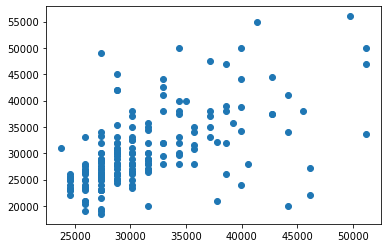

In [231]:
# Create prediction using model and analyse residual error
y_hat3 = reg_sm3.predict(X_test3)
rmse3 = math.sqrt(mean_squared_error(y_hat3, y_test3))
print(f'RMSE: {rmse3}')
plt.scatter(y_hat3, y_test3);

In [232]:
# 5-Fold Cross Validation
from sklearn.model_selection import cross_val_score
X4 = X3.copy()
y4 = y3.copy()

In [235]:
# Create model and run cross validation
reg4 = LinearRegression()
scores = cross_val_score(reg4, X4, y4, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(np.abs(scores)))

5906.786584061745

In [236]:
# Run cross validation using shuffled sets
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scores2 = cross_val_score(reg4, X4, y4, cv=cv, scoring='neg_mean_squared_error')
np.mean(np.sqrt(np.abs(scores2)))

5938.228817871357